(2475, 280, 280)


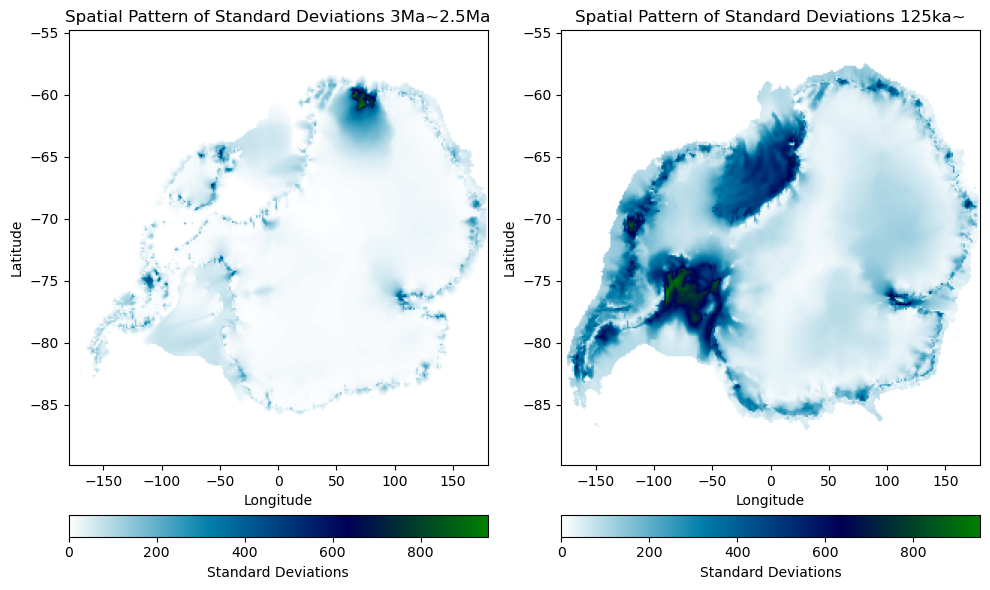

In [95]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the first dataset
data_file1 = '/Users/kyra/documents/Summer23/3shmergeh.nc'
dataset1 = nc.Dataset(data_file1)

slat1 = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lat_data.nc')
slat1 = slat1.alatd
slon1 = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lon_data.nc')
slon1 = slon1.alond

# Extract the grid points variable from the first dataset
grid_points1 = dataset1['h']
print(grid_points1.shape)

# Calculate the standard deviation of each grid point for the first dataset
std_devs1 = np.std(grid_points1, axis=0)
std_devs1 = np.squeeze(std_devs1)

# Load the second dataset
data_file2 = '/Users/kyra/documents/Summer23/test.nc'
dataset2 = nc.Dataset(data_file2)

slat2 = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lat_data.nc')
slat2 = slat2.alatd
slon2 = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lon_data.nc')
slon2 = slon2.alond

# Extract the grid points variable from the second dataset
grid_points2 = dataset2['h'][:]

# Calculate the standard deviation of each grid point for the second dataset
std_devs2 = np.std(grid_points2, axis=0)

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot the spatial pattern for the first dataset
im1 = ax1.imshow(std_devs1, cmap='ocean_r', extent=[slon1.min(), slon1.max(), slat1.min(), slat1.max()], aspect='auto')
ax1.set_title('Spatial Pattern of Standard Deviations 3Ma~2.5Ma')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

divider1 = make_axes_locatable(ax1)
cax = divider1.append_axes('bottom', size='5%', pad=0.5)
cbar = plt.colorbar(im2, cax=cax, orientation='horizontal')
cbar.set_label('Standard Deviations')

# Plot the spatial pattern for the second dataset
im2 = ax2.imshow(std_devs2, cmap='ocean_r', extent=[slon2.min(), slon2.max(), slat2.min(), slat2.max()], aspect='auto')
ax2.set_title('Spatial Pattern of Standard Deviations 125ka~')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

plt.tight_layout()

divider = make_axes_locatable(ax2)
cax = divider.append_axes('bottom', size='5%', pad=0.5)

# Create the colorbar
cbar = plt.colorbar(im2, cax=cax, orientation='horizontal')
cbar.set_label('Standard Deviations')

plt.show()

# Close the datasets
dataset1.close()
dataset2.close()